In [1]:
#Imports
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt
import itertools

from sklearn import mixture
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, linear_model, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [2]:
#Download the data and create encoded dataframe.
df = pd.read_csv('wisconsinstats.csv')
#Big10 Teams:
bt = ['Illinois', 'Indiana', 'Iowa', 'Maryland', 'Michigan St.', 'Michigan', 'Minnesota','Nebraska','Northwestern','Ohio St.', 'Penn St.', 'Purdue','Rutgers','Wisconsin']
#Synergy Columns:
df['Spot Up PTS'] = [13,16,20,5,12,26,20,8,10,8,16,20,27,11,22,16,22,35,15,14,14,15,9,6,15,18,14,29,9,13,21,18,19,5,19,24,29,27,16,20]
df['Transition PTS'] = [17,20,9,8,20,6,22,15,13,13,9,14,34,6,11,8,7,10,8,2,12,4,6,17,21,7,4,14,29,8,11,12,7,18,9,0,13,10,16,9]
df['P&R PTS'] = [7,18,9,7,7,9,8,7,6,2,6,5,5,6,2,4,10,11,12,10,13,7,6,12,11,8,4,4,2,5,8,3,7,9,10,10,17,6,4,9]
df['PTS off Cuts'] = [9,2,6,8,6,17,8,4,10,14,18,11,14,12,15,14,12,9,2,5,6,18,14,10,8,9,6,9,8,12,11,12,10,6,9,15,12,8,13,5]
df['Second Chance PTS'] = [2,4,0,1,3,2,0,4,5,4,0,8,4,8,0,4,2,1,5,3,4,4,10,3,2,6,7,2,10,2,4,11,4,2,0,4,4,0,2,6]
df['Post-Up PTS'] = [8,2,13,18,7,10,10,10,9,6,6,11,14,7,8,4,5,4,15,8,11,7,12,2,10,21,11,6,6,15,11,11,8,9,11,4,4,5,2,3]
df['Opp Spot Up PTS'] = [7,20,23,23,24,11,21,20,11,13,28,21,15,27,23,16,16,23,27,35,12,21,20,16,20,20,14,20,17,29,14,27,5,26,27,29,8,15,25,12]
df['OPP Transition PTS'] = [8,4,9,14,14,16,10,4,22,8,17,5,6,10,12,20,17,24,26,18,12,2,15,25,17,12,27,23,20,6,12,16,22,27,6,19,11,10,2,17]
df['OPP P&R PTS'] = [8,2,0,4,17,9,8,6,5,2,4,14,5,4,5,9,16,17,2,13,16,16,6,0,11,15,16,8,13,0,3,0,7,10,14,4,12,4,6,4]
df['OPP PTS off Cuts'] = [6,2,11,7,0,13,4,12,15,5,4,3,5,4,9,11,7,5,8,4,9,2,2,8,0,7,15,9,11,5,12,13,4,6,4,20,7,9,6,0]
df['OPP Second Chance Points'] = [6,2,3,0,2,7,0,1,11,3,3,6,2,1,8,8,4,11,7,3,6,2,8,4,12,6,10,8,4,0,7,5,11,6,2,2,8,4,6,6]
df['OPP Post-Up PTS'] = [4,5,15,16,4,2,4,4,11,8,3,2,0,0,6,4,6,6,14,2,2,16,4,8,13,8,6,0,0,0,15,2,10,5,11,8,11,9,13,0]
#Add games to df:
df.loc[len(df.index)] = ['at St. Thomas (MN)',	'12/13/23',	'78-55','W',58,.466,16,.438,23,.739, 16,24, 40,37.4,13,14,17,6,14,78,55,53,.377,23,.348,9,.778,10,17,27,22,16,22,1,7,17,11,5,10,13,5,15,11,11,6,4,8]
df.loc[len(df.index)] = ['vs Eastern Ill.',	'12/21/23',	'76-64','W', 59,.441,17,.412, 21,.810,11,25,36,37.3,11,14,12,3,12,76,64,56,.464,18,.444,9,.444,8,24,32,13,13,17,7,6,9,25,4,11,4,6,17,14,5,4,0,9]
df.loc[len(df.index)] = ['at Purdue','12/30/23','50-89','L',51,.353,14,.214,14,.786,5,19,24,36.2,13,11,21,5,6,50,89, 68,.515,20,.450,13,.769,17,27,44,17,23,12,3,12,18,5,3,15,0,2,19,30,4,8,5,17]
df.loc[len(df.index)] = ['vs Nebraska',	'01/04/24',	'57-69','L',61,.361,33,.212,8,.750,14,24,38,36.3,16,15,14,4,4,57,69,57,.439,27,.333,18,.556,12,24,36,13,15,11,0,7,18,8,9,6,2,10,23,7,8,6,2,11]
df.loc[len(df.index)] = ['at Illinois','01/07/24','67-61','W',58,.362,28,.214,25,.760,16,31,47,37.1,9,15,18,5,5,67,61,70,.371,18,.278,6,.667,12,23,35,21,10,10,1,4,15,16,10,1,6,10,12,14,21,2,4,0]
df.loc[len(df.index)] = ['vs Northwestern','01/10/24','69-74','L',60,.417,25,.280,14,.857,10,26,36,37.0,12,19,13,7,8,69,74,69,.391,15,.467,15,.867,17,26,43,10,17,10,2,6,21,7,0,27,5,4,16,8,10,18,0,11]
df.loc[len(df.index)] = ['at Michigan',	'01/13/24',	'52-76','L',39,.487,17,.353,11,.727,5,27,32,36.7,21,11,28,2,2,52,76,73,.397,18,.333,22,.545,22,15,37,16,13,7,0,12,17,5,8,7,0,6,23,12,6,8,16,2]
df.loc[len(df.index)] = ['at Iowa',	'01/16/24','50-96',	'L',54,.315,20,.200,13,.923,12,23,35,36.6,25,11,28,3,7,50,96,61,.475,37,.405,26,.885,11,26,37,13,25,14,4,17,18,6,5,4,8,9,25,24,8,11,4,8]
df.loc[len(df.index)] = ['vs Minnesota','01/23/24','59-56','W',55,.400,27,.259,12,.667,11,32,43,36.9,12,14,18,2,3,59,56,68,.338,21,.238,6,.833,12,22,34,14,9,5,4,8,9,5,7,2,4,20,7,19,4,2,8,7]
df.loc[len(df.index)] = ['vs Rutgers','01/27/24','73-62','W',60,.417,26,.192,22,.818,13,29,42,37.2,20,18,19,5,7,73,62,59,.356,11,.364,21,.762,10,23,33,19,12,16,2,7,4,5,23,8,2,17,13,13,7,6,4,15]
df.loc[len(df.index)] = ['at Ohio St.','02/01/24','49-87','L',52,.327,18,.222,13,.846,16,24,40,37.2,13,10,27,3,4,49,87,66,.500,21,.381,16,.813,11,20,31,14,24,8,2,13,11,8,4,4,8,10,25,23,2,14,2,6]
df.loc[len(df.index)] = ['at Northwestern','2/04/24','43-69','L',62,.258,26,.154,7-12,.583,13,25,38,37.4,17,10,19,3,7,69,43,60,.433,14,.357,15,.800,9,31,40,12,19,15,3,11,13,13,2,5,2,6,3,12,21,2,10,16]
df.loc[len(df.index)] = ['vs Penn St.','02/11/24','69-64','W',56,.446,15,.333,19,.737,9,29,38,37.4,16,15,22,6,13,64,69,60,.383,28,.286,18,.556,11,22,33,19,9,21,4,12,19,20,6,2,6,7,9,24,12,2,2,5]
df.loc[len(df.index)] = ['vs Indiana','02/14/24','54-68','L',42,.429,7,.143,21,.810,7,25,32,37.2,15,7,19,6,2,68,54,54,.444,20,.500,16,.625,7,19,26,21,17,11,3,8,9,0,9,7,5,16,12,11,15,8,0,9]
df.loc[len(df.index)] = ['at Rutgers','02/17/24','61-43','W',58,.414,18,.278,12,.667,9,30,39,37.3,12,18,15,7,7,43,61,53,.321,14,.286,11,.455,9,25,34,18,9,19,2,7,13,22,3,8,5,2,18,3,4,3,4,11]
df.loc[len(df.index)] = ['at Minnesota','02/20/24','67-56','W',53,.415,19,.263,26,.692,16,23,39,37.3,16,12,14,4,9,56,67,49,.408,13,.308,19,.632,12,20,32,25,10,17,4,3,15,9,11,7,7,9,10,3,14,10,5,4]
df.loc[len(df.index)] = ['vs Purdue','02/25/24','55-79','L',54,.407,22,.364,8,.375,13,16,29,37.0,12,15,22,4,3,79,55,58,.500,14,.500,16,.875,12,20,32,16,13,15,0,14,23,9,2,17,0,4,2,23,3,8,7,14]
df.loc[len(df.index)] = ['at Maryland','02/29/24','63-79','L',56,.429,20,.250,11,.909,10,22,32,36.8,22,14,20,3,8,79,63,56,.446,15,.467,27,.815,11,22,33,14,17,15,2,9,15,10,8,6,4,10,16,23,6,10,12,4]
df.loc[len(df.index)] = ['vs Michigan St.',	'03/03/24',	'52-78','L',54,.370,23,.304,5,1.000,11,21,32,36.6,19,11,25,8,5,78,52,55,.491,17,.353,20,.900,7,21,28,10,10,14,1,14,8,10,5,4,7,10,9,30,19,6,2,6]
df.loc[len(df.index)] = ['at Penn St.','03/07/24','56-80','L',57,.351,26,.231,16,.625,11,18,29,36.4,10,11,13,5,3,80,56,65,.492,22,.273,11,.909,16,28,44,19,20,10,4,8,24,6,10,10,2,2,18,13,17,12,5,10]
df.loc[len(df.index)] = ['at Southern Ind.','03/25/24','67-62','W',49,.408,17,.294,27,.815,9,26,35,36.3,23,14,16,10,11,62,67,56,.339,17,.529,20,.750,12,22,34,22,13,19,2,7,16,28,2,2,4,11,24,6,9,6,7,6]
df.loc[len(df.index)] = ['vs Illinois St.','03/28/24','86-61','W',62,.516,19,.474,15,.867,10,28,38,36.4,17,22,13,2,8,61,86,60,.367,18,.167,18,.778,11,21,32,14,9,14,3,5,18,17,11,4,7,13,11,16,10,4,9,7]
year_list = []
is_btn = []
df['Win'] = df['Win'].replace(['L','W'],[1,0])
df['FGPCT'] = df['FGPCT'] * 100
df['3FGPCT'] = df['3FGPCT'] * 100
df['FTPCT'] = df['FTPCT'] * 100
df['OPP FGPCT'] = df['OPP FGPCT'] * 100
df['OPP 3FGPCT'] = df['OPP 3FGPCT'] * 100
df['OPP FTPCT'] = df['OPP FTPCT'] * 100
df['FGM'] = round(df['FGA'] * df['3FGPCT'] / 100)
df['3FGM'] = round(df['3FGA'] * df['3FGPCT'] / 100)
df['FTM'] = round(df['FTA'] * df['FTPCT'] / 100)
df['OPP 3FGM'] = round(df['OPP 3FGA'] * df['OPP 3FGPCT'] / 100)
df['OPP FTM'] = round(df['OPP FTA'] * df['OPP FTPCT'] / 100)
for i in range(len(df)):
    year_list.append(df['Date'][i][-2:])
    if df['Opponent'][i][3:] in bt:
        is_btn.append(True)
    else:
        is_btn.append(False)
df['Big10'] = is_btn
df['Year'] = year_list
btn_gms = df[(df['Big10'] == True)]

In [3]:
#Create train, test, and validation.
X = df.drop(['Win','Date','Score','Opponent','AVG','PTS','ALLOWED','BLK','OPP BLK','Year','Big10','FGPCT','OPP FGPCT','3FGPCT','OPP 3FGPCT','AST','OPP AST','FGM','FGA'], axis=1)
y = df['Win']
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
# Split the data into training (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [4]:
#Find the best model for the data:
classifiers = [svm.SVC(), linear_model.LogisticRegression(), #DecisionTreeClassifier(),
               Ridge(),
               #RandomForestClassifier()
              ]
parameters = [{'kernel': ['linear'], 'C': (0.001,0.01,0.1,1,10,100),}, 
              {'max_iter': [5000,10000,50000],'solver': ('newton-cg','liblinear'), 'C': (0.001,0.01,0.1,1,10,100)},
              #{'criterion': ['entropy','gini','log_loss'], 'max_depth': (1,3,5,7,9,11,13)},
              {'alpha': (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)},
             #{'n_estimators': [50, 100, 200],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'max_features': ['sqrt', 'log2'],'bootstrap': [True, False],}
]
best_score = -np.Inf
best_i = -1
best_class = None
for i in [0,1,2]:
    clf = GridSearchCV(estimator = classifiers[i], param_grid = parameters[i])
    clf.fit(X_train,y_train)
    score = clf.best_score_
    if score > best_score:
        best_score = score
        best_i = i
        best_class = clf
print(f'The index of the best classifier is {best_i}')
print(f'The best accuracy score on the validation data is {best_score}')
print(f'The best classifier with its hyperparamter settings is {best_class.best_params_}')

The index of the best classifier is 1
The best accuracy score on the validation data is 0.96
The best classifier with its hyperparamter settings is {'C': 0.1, 'max_iter': 5000, 'solver': 'newton-cg'}


In [5]:
#Discover Feature Importance
svm_model = svm.SVC(C=0.1, kernel='linear')
svm_model.fit(X_train, y_train)
#logreg_model = linear_model.LogisticRegression(C = 1,max_iter = 5000, solver = 'newton-cg')
#logreg_model.fit(X_train,y_train)
#Get the coefficients from the linear SVM
coefficients = svm_model.coef_[0]
#coefficients = logreg_model.coef_[0]

# Create a DataFrame with feature names and coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Display feature importance
print(feature_importance.sort_values(by='Coefficient', key=abs, ascending=False))

                     Feature  Coefficient
17                    OPP TO    -0.443396
8                        STL    -0.343885
20            Transition PTS    -0.303824
4                        DEF    -0.241559
33                  OPP 3FGM     0.222045
32                       FTM    -0.214407
26        OPP Transition PTS     0.202625
5                        TOT    -0.185047
10                  OPP 3FGA     0.181849
23         Second Chance PTS     0.163172
22              PTS off Cuts     0.161863
19               Spot Up PTS    -0.153989
16                    OPP PF    -0.147438
1                        FTA    -0.144760
2                      FTPCT    -0.142248
7                         TO     0.139439
31                      3FGM    -0.133029
18                   OPP STL     0.123929
6                         PF     0.108555
11                   OPP FTA     0.097711
21                   P&R PTS    -0.089763
0                       3FGA     0.087250
28          OPP PTS off Cuts    -0

In [6]:
class_labels = sorted(y.unique())

selected_features = ['TOT', 'OPP 3FGM', 'Transition PTS', 'FTM', 'OPP Transition PTS','OPP TO']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_train_selected = X_train[selected_features]
dt_class = [DecisionTreeClassifier()]
dt_params = [{'criterion': ['entropy','gini','log_loss'], 'max_depth': (2,3,4,5)}]
dtclf = GridSearchCV(estimator = dt_class[0], param_grid = dt_params[0])
dtclf.fit(X_train_selected,y_train)
dtscore = dtclf.best_score_
print(f'The best hyperparameters are {dtclf.best_params_}')
print(f'The score on of the best hyperparameters is {dtscore}')

The best hyperparameters are {'criterion': 'gini', 'max_depth': 4}
The score on of the best hyperparameters is 0.7533333333333332


Accuracy on the test set using selected features: 0.857


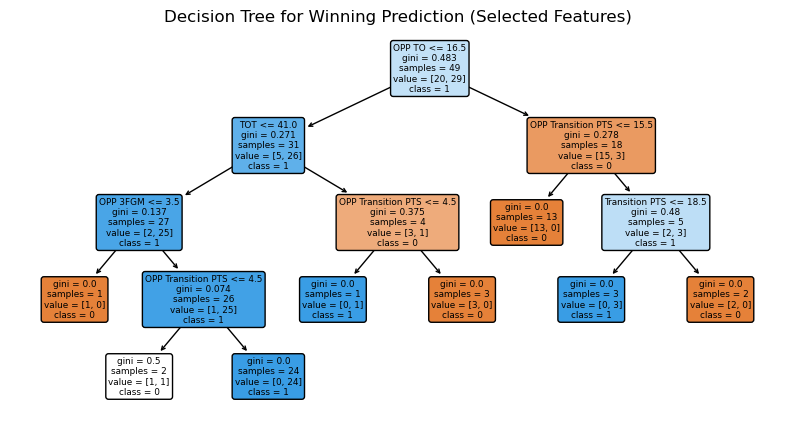

In [7]:
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth= 4)
dt_classifier.fit(X_train_selected, y_train)

X_test_selected = X_test[selected_features]
y_pred = dt_classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set using selected features: {accuracy:.3f}')


plt.figure(figsize=(10, 5))
plot_tree(dt_classifier, feature_names=selected_features, class_names=[str(label) for label in class_labels],filled=True, rounded=True)
plt.title("Decision Tree for Winning Prediction (Selected Features)")
plt.show()

In [8]:
loss_26def = len(df[(df['DEF'] >= 25.5) & (df['Win'] == 1) & (df['Year'] == '24')])
win_26def = len(df[(df['DEF'] >= 25.5) & (df['Win'] == 0) & (df['Year'] == '24')])
print(f'Our record when we have at least 26 defensive rebounds is {win_26def}-{loss_26def}')
loss_less26def = len(df[(df['DEF'] <= 25.5) & (df['Win'] == 1) & (df['Year'] == '24')])
win_less26def = len(df[(df['DEF'] <= 25.5) & (df['Win'] == 0) & (df['Year'] == '24')])
print(f'Our record when we have less than 26 defensive rebounds is {win_less26def}-{loss_less26def}')
avg_offall = df[(df['Year'] == '24')]['OPP OFF'].mean()
avg_def = df[(df['Year'] == '24')]['DEF'].mean()
print(f'We give up an average of {avg_offall.round(2)} offensive rebounds and have an average of {avg_def.round(2)} defensive rebounds this year')

Our record when we have at least 26 defensive rebounds is 7-2
Our record when we have less than 26 defensive rebounds is 1-9
We give up an average of 11.79 offensive rebounds and have an average of 25.21 defensive rebounds this year


In [9]:
loss_9tp = len(df[(df['OPP Transition PTS'] >= 15.5) & (df['Win'] == 1)& (df['Year'] == '24')])
win_9tp = len(df[(df['OPP Transition PTS'] >= 15.5) & (df['Win'] == 0)& (df['Year'] == '24')])
print(f'Our record when we give up at least 16 transition points is {win_9tp}-{loss_9tp}')
loss_less9tp = len(df[(df['OPP Transition PTS'] <= 15.5) & (df['Win'] == 1)& (df['Year'] == '24')])
win_less9tp = len(df[(df['OPP Transition PTS'] <= 15.5) & (df['Win'] == 0)& (df['Year'] == '24')])
print(f'Our record when we give up less than 16 transition points is {win_less9tp}-{loss_less9tp}')
avg_tp = df[(df['Year'] == '24')]['OPP Transition PTS'].mean()
print(f'We give up {avg_tp.round(2)} transition points per game this year.')

Our record when we give up at least 16 transition points is 3-5
Our record when we give up less than 16 transition points is 5-6
We give up 14.95 transition points per game this year.


In [10]:
loss_15ftm = len(df[(df['FTM'] >= 13.0) & (df['Win'] == 1) & (df['Year'] == '24')])
win_15ftm = len(df[(df['FTM'] >= 13.0) & (df['Win'] == 0) & (df['Year'] == '24')])
print(f'Our record when we have at least 13 free throws is {win_15ftm}-{loss_15ftm}')
loss_less15ftm = len(df[(df['FTM'] <= 13.0) & (df['Win'] == 1) & (df['Year'] == '24')])
win_less15ftm = len(df[(df['FTM'] <= 13.0) & (df['Win'] == 0) & (df['Year'] == '24')])
print(f'Our record when we have less than 13 free throws is {win_less15ftm}-{loss_less15ftm}')
avg_ftm = df[(df['Year'] == '24')]['FTM'].mean()
print(f'We average {avg_ftm.round(2)} free throws per game this year.')
avg_ftpct = (df[(df['Year'] == '24')]['FTM'] / (df[(df['Year'] == '24')]['FTA'])).mean() * 100
print(f'Shoot {avg_ftpct.round(2)} on average in free throws per game this year.')

Our record when we have at least 13 free throws is 6-1
Our record when we have less than 13 free throws is 3-10
We average 11.11 free throws per game this year.
Shoot 76.02 on average in free throws per game this year.


In [11]:
loss_18to = len(df[(df['OPP TO'] >= 16.5) & (df['Win'] == 1)& (df['Year'] == '24')])
win_18to = len(df[(df['OPP TO'] >= 16.5) & (df['Win'] == 0)& (df['Year'] == '24')])
print(f'Our record when we force at least 17 turnovers is {win_18to}-{loss_18to}')
loss_less18to = len(df[(df['OPP TO'] <= 16.5) & (df['Win'] == 1)& (df['Year'] == '24')])
win_less18to = len(df[(df['OPP TO'] <= 16.5) & (df['Win'] == 0)& (df['Year'] == '24')])
print(f'Our record when we force less than 17 turnovers is {win_less18to}-{loss_less18to}')
avg_oto = df[(df['Year'] == '24')]['OPP TO'].mean()
print(f'We force {avg_oto.round(2)} turnovers per game over the last year.')

Our record when we force at least 17 turnovers is 4-0
Our record when we force less than 17 turnovers is 4-11
We force 13.21 turnovers per game over the last year.


In [12]:
df.iloc[-1]

Opponent                    vs Illinois St.
Date                               03/28/24
Score                                 86-61
Win                                       0
FGA                                      62
FGPCT                                  51.6
3FGA                                     19
3FGPCT                                 47.4
FTA                                      15
FTPCT                                  86.7
OFF                                      10
DEF                                      28
TOT                                      38
AVG                                    36.4
PF                                       17
AST                                      22
TO                                       13
BLK                                       2
STL                                       8
PTS                                      61
ALLOWED                                86.0
OPP FGA                                  60
OPP FGPCT                       